<a href="https://colab.research.google.com/github/weso500/QMLIIOT/blob/main/TEPQSVM_Pauli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 11.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.2.2
    Uninstalling qiskit-2.2.2:
      Successfully uninstalled qiskit-2.2.2


In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import PauliFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

dimension = 11
feature_map = PauliFeatureMap(feature_dimension=dimension, reps=1, entanglement="full")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [ ]:
import pandas as pd
import numpy as np

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/QMLIIOT/TEP9Train.csv')

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/QMLIIOT/TEP9Test.csv')

# Convert training features to numpy array and select 100 samples
train_features = train_df.to_numpy()

test_features= test_df.to_numpy()

# Create target arrays for training and testing data
test_target = np.concatenate((np.zeros(50), np.ones(10)))

# Ensure arrays are of size samples*8 (assuming 8 is the number of features)
print(f"Shape of train_features: {train_features.shape}")
print(f"Shape of test_features: {test_features.shape}")
print(f"Shape of test_target: {test_target.shape}")

Shape of train_features: (200, 11)
Shape of test_features: (60, 11)
Shape of test_target: (60,)


In [ ]:
matrix_train = kernel.evaluate(x_vec=train_features)
matrix_test = kernel.evaluate(x_vec=test_features, y_vec=train_features)

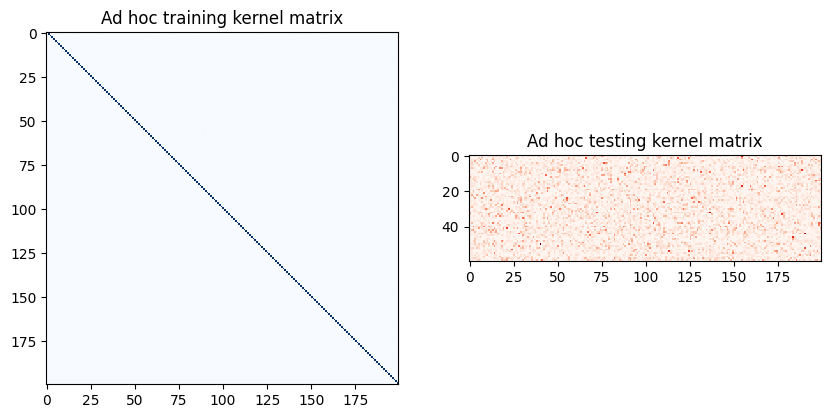

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [ ]:
import numpy as np
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel='precomputed', nu=0.08)  # nu = anomaly proportion
ocsvm.fit(matrix_train)

OneClassSVM(kernel='precomputed', nu=0.08)

In [ ]:
scores = ocsvm.decision_function(matrix_test)
print(scores)

[-0.07836232 -0.07992138 -0.07947545 -0.08298652 -0.07928917 -0.08188377
 -0.07897019 -0.07713487 -0.07442626 -0.07847567 -0.08097594 -0.08163747
 -0.08048009 -0.08165547 -0.08004393 -0.08049002 -0.07847216 -0.08021139
 -0.0818506  -0.07664117 -0.0800369  -0.08385348 -0.08421681 -0.08104525
 -0.07531863 -0.07801958 -0.07889622 -0.08250942 -0.08057295 -0.07941967
 -0.07481546 -0.08224296 -0.07494668 -0.08042631 -0.07727593 -0.07914573
 -0.08473837 -0.0836146  -0.07612375 -0.08185022 -0.07682497 -0.07604043
 -0.07603645 -0.07845227 -0.07360806 -0.08149727 -0.08243684 -0.08506795
 -0.07970407 -0.07959699 -0.07757202 -0.07691996 -0.08088256 -0.08000205
 -0.0798928  -0.07998788 -0.0834641  -0.083788   -0.07586765 -0.07507065]


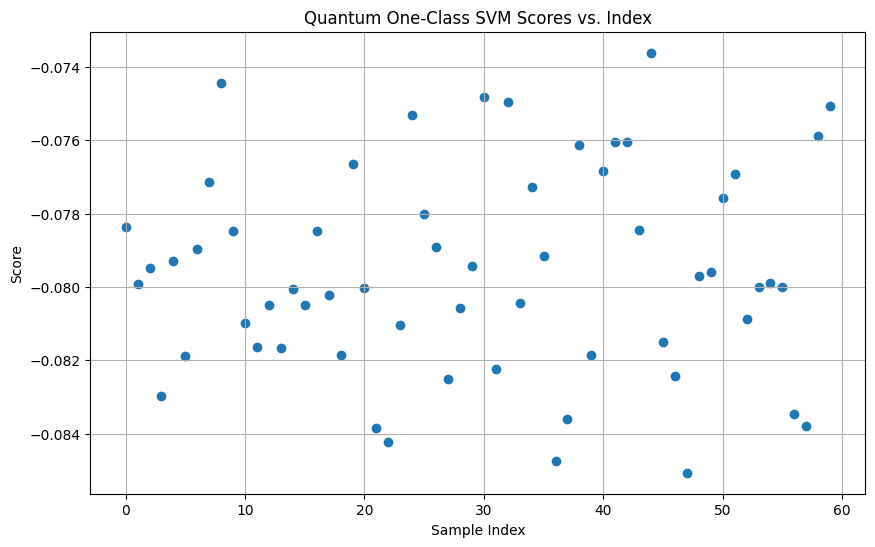

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of scores vs. index
plt.figure(figsize=(10, 6))
plt.scatter(range(len(scores)), scores)
plt.title("Quantum One-Class SVM Scores vs. Index")
plt.xlabel("Sample Index")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [ ]:

import numpy as np
import pandas as pd
import pywt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



fpr, tpr, thresholds = metrics.roc_curve(test_target, scores, pos_label=1)
optimal_idx = np.argmax(tpr - fpr)
loss_threshold = (thresholds[optimal_idx], 6)

auc = metrics.auc(fpr, tpr)
print(auc)


0.536
